1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [67]:
# Load data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
import statsmodels.formula.api as sm
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [68]:
df = df.replace({'default':{'No':0, 'Yes':1}})
df = df.replace({'student':{'No':0, 'Yes':1}})
df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

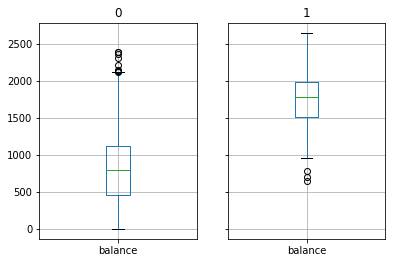

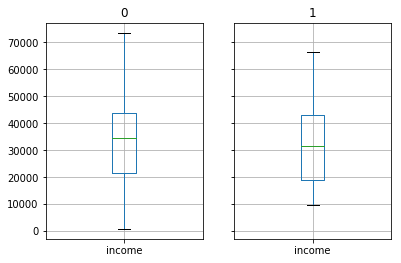

In [69]:
grouped = df.groupby('default')
grouped.boxplot(column='balance')
grouped.boxplot(column='income')


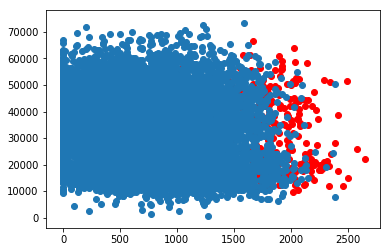

In [70]:
#Scatter plot
plt.figure()
plt.scatter(df.loc[df['default'] == 1, 'balance'] , df.loc[df['default'] == 1, 'income'] , color='r')
plt.scatter(df.loc[df['default'] == 0, 'balance'] , df.loc[df['default'] == 0, 'income'])


4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

X = df.drop(['default', 'student'],axis=1)
y = df['default']
# Split the data into test and training sets, with 30% of samples being put into the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c)
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

C: 10
Coefficient of each feature: [[5.36300272e-03 1.40195533e-05]]
Training accuracy: 0.9732857142857143
Test accuracy: 0.9733333333333334

C: 1
Coefficient of each feature: [[5.59432392e-03 1.70581242e-05]]
Training accuracy: 0.9738571428571429
Test accuracy: 0.9733333333333334

C: 0.1
Coefficient of each feature: [[4.60514160e-03 3.22832394e-06]]
Training accuracy: 0.9721428571428572
Test accuracy: 0.9726666666666667

C: 0.001
Coefficient of each feature: [[ 0.00046804 -0.00012799]]
Training accuracy: 0.9652857142857143
Test accuracy: 0.9683333333333334



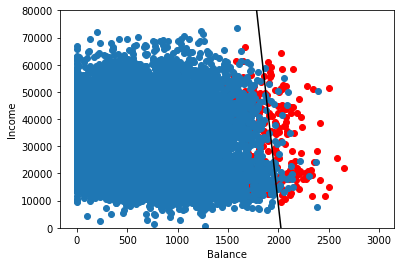

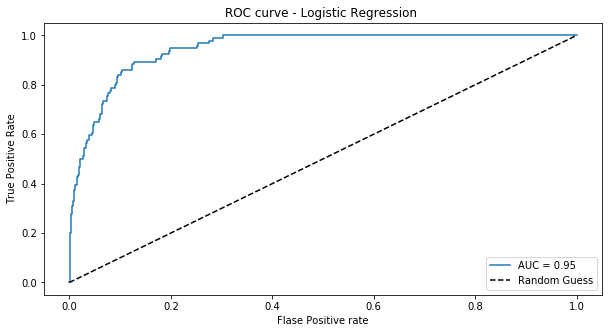

In [72]:
clf = LogisticRegression(penalty='l1', C=1)
clf.fit(X_train, y_train)

#Scatter plot
plt.figure()
plt.ylim(0,80000)
plt.scatter(df.loc[df['default'] == 1, 'balance'] , df.loc[df['default'] == 1, 'income'] , color='r')
plt.scatter(df.loc[df['default'] == 0, 'balance'] , df.loc[df['default'] == 0, 'income'])

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 3000)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.xlabel('Balance')
plt.ylabel('Income')

from sklearn.metrics import roc_curve, roc_auc_score, auc
from matplotlib import pyplot as plt
from sklearn import metrics

predictions = clf.predict_proba(X_test)

fpr2, tpr2, _ = roc_curve(y_test, predictions[:,1])
roc_auc2 = auc(fpr2, tpr2)
plt.figure(figsize=(10,5))
plt.plot(fpr2, tpr2,label ='AUC = %.2f'%(roc_auc2))
plt.xlabel('Flase Positive rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Logistic Regression ')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label = 'Random Guess')
plt.legend(loc=4)
plt.show()

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

X = df.drop(['default'],axis=1)
y = df['default']
# Split the data into test and training sets, with 30% of samples being put into the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c)
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

C: 10
Coefficient of each feature: [[-6.08966957e-01  5.52809017e-03 -1.76848686e-06]]
Training accuracy: 0.9731428571428572
Test accuracy: 0.9736666666666667

C: 1
Coefficient of each feature: [[-5.38384331e-01  5.60154712e-03  1.24661556e-06]]
Training accuracy: 0.9734285714285714
Test accuracy: 0.9736666666666667

C: 0.1
Coefficient of each feature: [[-5.94635298e-01  4.67217697e-03 -1.38241357e-05]]
Training accuracy: 0.972
Test accuracy: 0.973

C: 0.001
Coefficient of each feature: [[ 0.          0.00046952 -0.00012805]]
Training accuracy: 0.9652857142857143
Test accuracy: 0.9683333333333334



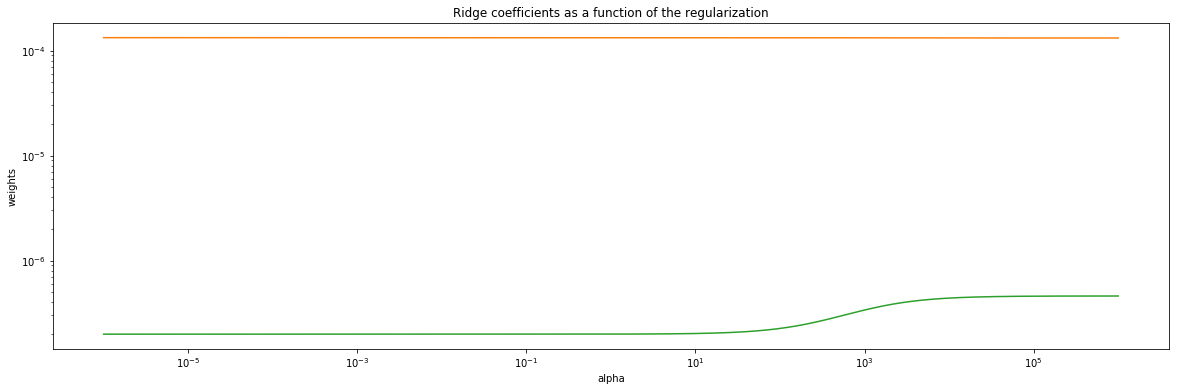

1e-06


In [74]:
from pandas import Series
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()

X = df.drop(['default'],axis=1)
y = df['default']

# Split the data into test and training sets, with 30% of samples being put into the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

n_alphas = 200
alphas = np.logspace(-50,0, n_alphas)

coefs = []
train_errors = []
scores=[]
alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    train_errors.append(clf.score(X_train,y_train))
    scores.append(clf.score(X_test,y_test))
    coefs.append(clf.coef_)

# Display results
plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.loglog(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.show()

test_errors=scores
alpha_optim=alphas[np.argmax(scores)]

alpha_best = alpha_optim
print(alpha_best)



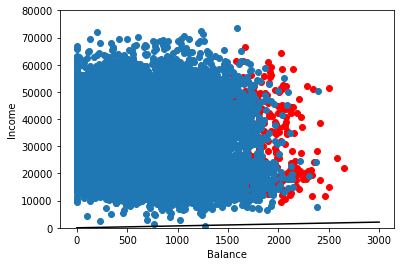

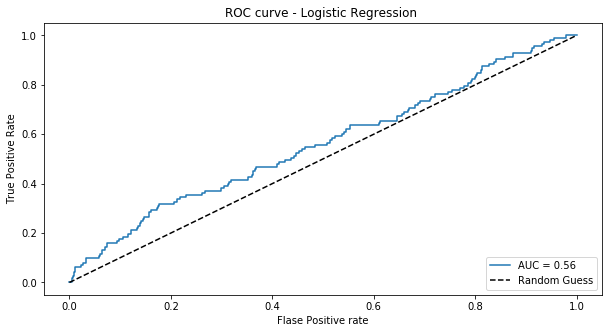

In [75]:
clf = LogisticRegression(penalty='l2', C=1)
clf.fit(X_train, y_train)

#Scatter plot
plt.figure()
plt.ylim(0,80000)
plt.scatter(df.loc[df['default'] == 1, 'balance'] , df.loc[df['default'] == 1, 'income'] , color='r')
plt.scatter(df.loc[df['default'] == 0, 'balance'] , df.loc[df['default'] == 0, 'income'])

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 3000)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.xlabel('Balance')
plt.ylabel('Income')

from sklearn.metrics import roc_curve, roc_auc_score, auc
from matplotlib import pyplot as plt
from sklearn import metrics

predictions = clf.predict_proba(X_test)

fpr2, tpr2, _ = roc_curve(y_test, predictions[:,1])
roc_auc2 = auc(fpr2, tpr2)
plt.figure(figsize=(10,5))
plt.plot(fpr2, tpr2,label ='AUC = %.2f'%(roc_auc2))
plt.xlabel('Flase Positive rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Logistic Regression ')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label = 'Random Guess')
plt.legend(loc=4)
plt.show()

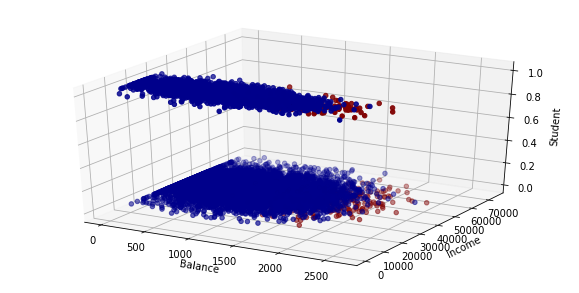

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

X = df.drop(['default'], axis =1)
y = df['default']

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

xs = X[X.columns[1]]
ys = X[X.columns[2]]
zs = X[X.columns[0]]

ax.scatter(xs[y==1],ys[y==1],zs[y==1],color='maroon')
ax.scatter(xs[y==0],ys[y==0],zs[y==0],color='darkblue' )
plt.xlabel('Balance')
plt.ylabel('Income')
ax.set_zlabel('Student')
plt.show()

In [77]:
#adding students does not seem to improve performance

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

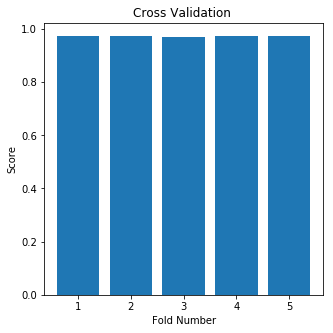

In [78]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime
from sklearn.tree import DecisionTreeClassifier

regr= LogisticRegression(penalty='l1', C=1)
regr_1 = DecisionTreeClassifier(max_depth=5)

R2=cross_val_score(regr, X, y, cv=5)
R2_Tree=cross_val_score(regr_1, X, y, cv=5)

plt.figure(figsize = (5,5))

plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Cross Validation ')


R1=plt.bar((1,2,3,4,5),R2)
plt.show()
mean_R2=R2.mean()
mean_R2_Tree=R2_Tree.mean()

std_R2=R2.std()
std_R2_Tree=R2_Tree.std()

plt.show()

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

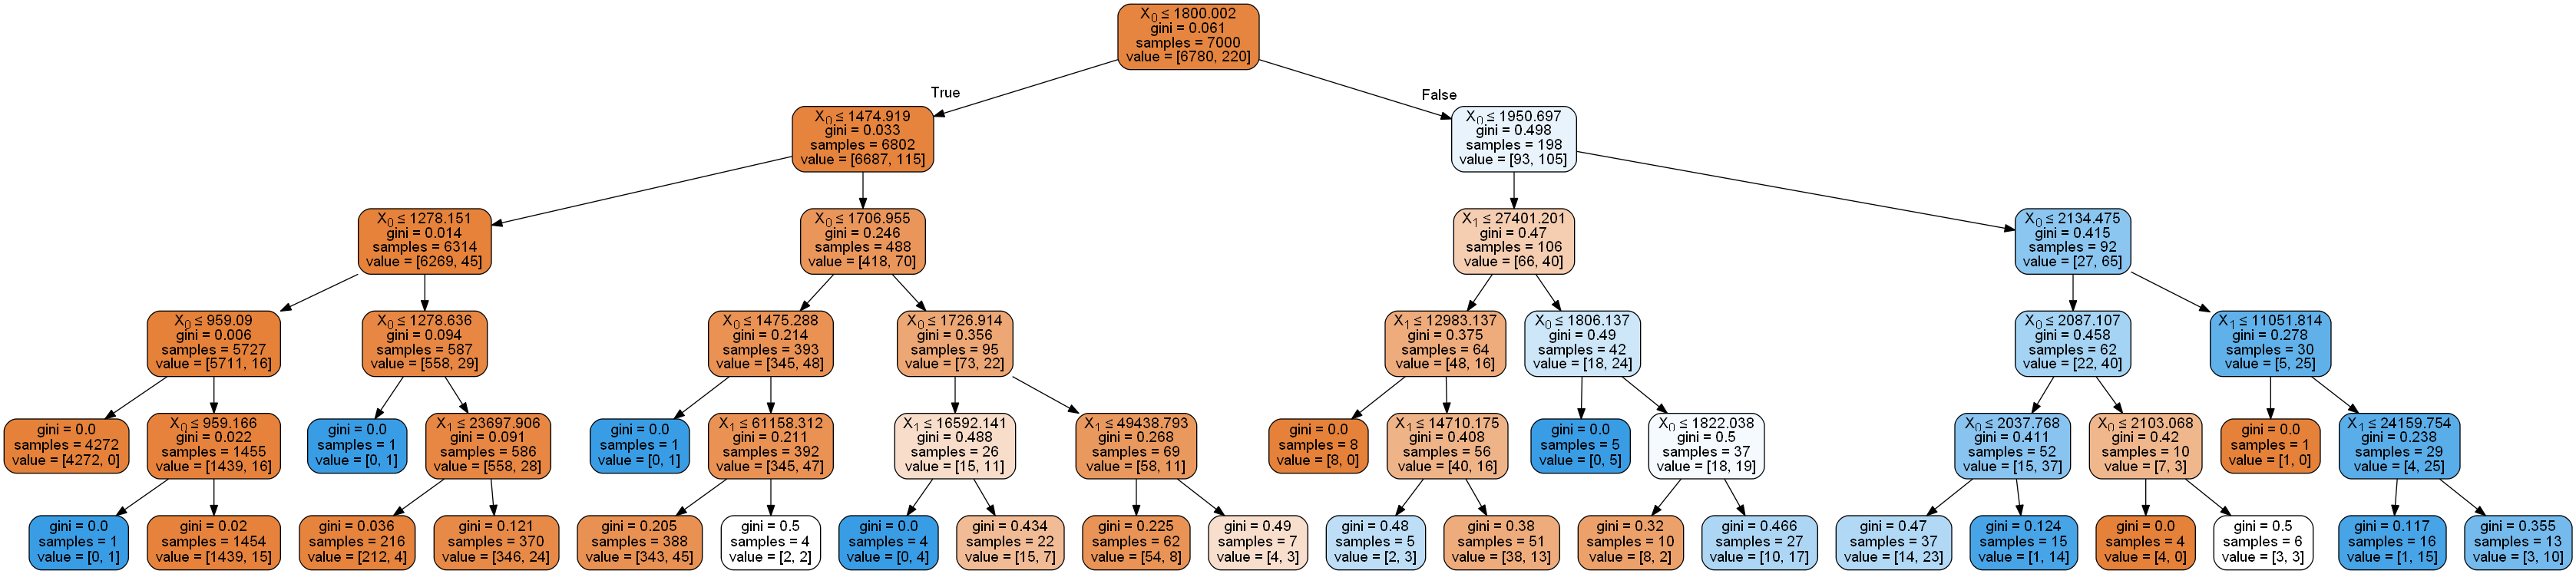

In [79]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.cross_validation as cv
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

X = df.drop(['default', 'student'], axis =1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regr_1 = DecisionTreeClassifier(max_depth=5)
regr_1.fit(X_train, y_train)
y = regr_1.predict(X_test)

dot_data = StringIO()
export_graphviz(regr_1, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), unconfined = True)

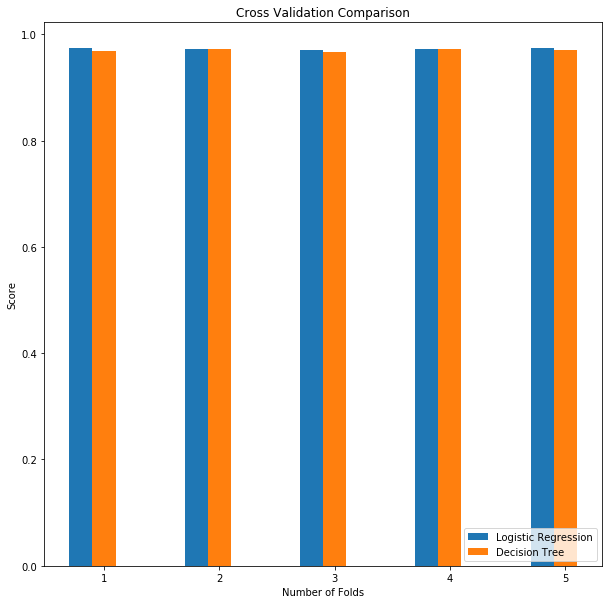

Mean:
Logistic Regression 0.9725999945999986
Decision Tree 0.970100344175086

Standard Deviation:
Logistic Regression 0.0010679147228263345
Decision Tree 0.002284588063202403


In [82]:
from sklearn.model_selection import cross_val_score
from matplotlib.pyplot import *

plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

R1=ax.bar((1-0.2,2-0.2,3-0.2,4-0.2,5-0.2),R2, width = 0.2)
R1_Tree=ax.bar((1,2,3,4,5),R2_Tree, width = 0.2)


plt.xlabel('Number of Folds')
plt.ylabel('Score')
plt.title('Cross Validation Comparison')
plt.legend([R1, R1_A],["Logistic Regression","Decision Tree"], loc=4)
plt.show()

print('Mean:')
print('Logistic Regression', mean_R2)
print('Decision Tree', mean_R2_Tree)
print('')
print('Standard Deviation:')
print('Logistic Regression', std_R2)
print('Decision Tree', std_R2_Tree)

In [83]:
#Logistic regression seems to have a slightly higher score than the Decision Tree

8) Find the optimal decision tree depth and compute the AUC ROC. 

Text(0.5,1,'Optimum Decision Depth')

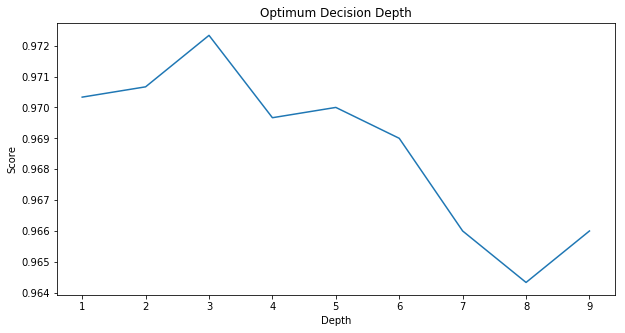

In [84]:
from sklearn.model_selection import train_test_split

X = df.drop(['default', 'student'], axis =1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

train_errors=[]
test_errors=[]
scores=[]
plt.figure(figsize = (10,5))
depths = range(1,10)
for n in depths:    
    regr = DecisionTreeClassifier(max_depth=n)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))
    
plt.plot(depths, scores)
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Optimum Decision Depth')

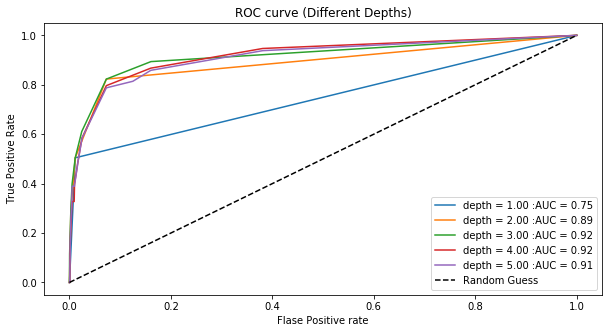

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from matplotlib import pyplot as plt
from sklearn import metrics

roc_auc = []
depths = range(1,6)

plt.figure(figsize = (10,5))
for n in depths:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    model = DecisionTreeClassifier(max_depth = n)
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)

    fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'depth = %.2f :AUC = %.2f'%(n, roc_auc))
    plt.xlabel('Flase Positive rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Different Depths)')
    plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label = 'Random Guess')
plt.legend(loc=4)
plt.show()